<a href="https://colab.research.google.com/github/ironcevic/basic_stats/blob/main/stats_and_linreg_solved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
BLOCK 1
Welcome to Google Colab! (yes single l)
Colab is set up in Python.
In Colab, some lines are code and some are comments.
This whole block is a comment because it is encased in quotes.
Comments can also be marked with #.
You can toggle # on and off using "Ctrl + /", or "Cmd + /" on Mac.
"""

print(f"Hello, world!") # this is a line of code
# print(f"This is commented out.") # this will not execute as it starts with #.

a = 5
# a = "ice cream"
print(f"a is {a}.") # is a 5 or ice cream?

Hello, world!
a is 5.


In [ ]:
"""
BLOCK 2
We will use this block to get our data.
Open the file explorer on the right and take a look at which files it creates.
"""

!git clone https://github.com/ironcevic/basic_stats.git
!cp basic_stats/* .
!rm -r sample_data
!rm -r basic_stats
from stats import *

Cloning into 'basic_stats'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 9 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (9/9), 4.15 KiB | 4.15 MiB/s, done.
Resolving deltas: 100% (2/2), done.
rm: cannot remove 'sample_data': No such file or directory


In [ ]:
"""
BLOCK 3
Here are some basic Python commands.
Try them out by uncommenting them one by one.
"""

import numpy as np # imports the NumPy library

# Basic printing
# print(1 + 1)           # prints: 2

# # String variables
# my_string = "monster truck"
# print(my_string)       # prints: monster truck

# # 1D arrays
# my_array = np.array([2, 3, 4, 5]) # an array is a list of numbers (a vector)
# print(my_array[0])     # prints: 2 (first element)
# print(my_array[-1])    # prints: 5 (last element)

# # 2D arrays
my_2d_array = np.array([[1, 2, 3], [4, 5, 6]]) # this is a matrix!
# print(my_2d_array)           # prints: [[1 2 3] [4 5 6]]
# print(my_2d_array.T)         # prints: [[1 4] [2 5] [3 6]]
# print(my_2d_array[0])        # prints: [1 2 3] (first row)
# print(my_2d_array[0, 1])     # prints: 2 (row 0, column 1)
# print(my_2d_array[:, 0])     # prints: [1 4] (first column)
# print(my_2d_array.T[0])      # prints: [1 4] (first column via transpose)

[1 4]


Question 1:
Alice and Bob are collecting rock samples from a cave, looking for thorium. They
will only get follow-up funding if they can show with 95% certainty that they
found a deposit with >5% thorium.
Alice collects samples from one wall of the cave (```alice_results.csv```).
Bob collects samples from several places (```bob_results.csv```).
Follow the instructions below to answer these questions:
  1. Will they get follow-up funding?
  2. Who had the better strategy?



To start, here are some useful formulae:

Mean: $\mu = \frac{\sum_N x_i}{N}$
```
mean = np.mean(results)
# results is a Python array
```
Standard deviation: $\sigma = \frac{\sum_N (x_i - \mu)}{N-1}$
```
st_dev = np.std(results, ddof=1)
# ddof = 1 tells Python that you have N-1 dofs
```
Standard error: $\sigma_x = \frac{\sigma}{\sqrt{N}}$
```
n_samples = len(results)
# determines the length of the results array
st_err = st_dev/np.sqrt(n_samples)
# computes the error
```


In [ ]:
"""
BLOCK 4
To start, look at the contentes of "alice_results.csv" using the file explorer.
Then, execute the code to we will load Alice's and Bob's results.
Then, adapt the code above to compute the mean, st_dev, and st_err.
"""

alice_results = np.genfromtxt("alice_results.csv", delimiter=",", skip_header=1)

mean_alice = np.mean(alice_results)
st_dev_alice = np.std(alice_results, ddof=1)
n_samples_alice = len(alice_results)
st_err_alice = st_dev_alice/np.sqrt(n_samples_alice)

# We need the 99%, or 2sigma, confidence interval.
CI_2sigma_low = mean_alice - 2*st_err_alice
CI_2sigma_high = mean_alice + 2*st_err_alice

print(f"Alice's mean: {mean_alice:.2f}")
print(f"Alice's st_dev: {st_dev_alice:.2f}")
print(f"Alice's st_err: {st_err_alice:.2f}")
print(f"Alice's 99% CI: [{CI_2sigma_low:.2f}, {CI_2sigma_high:.2f}]")


Alice's mean: 5.12
Alice's st_dev: 0.41
Alice's st_err: 0.04
Alice's 99% CI: [5.04, 5.20]


In [ ]:
"""
BLOCK 5
Now let's do the same for Bob.
Copy - paste - find & replace is your friend.
"""

bob_results = np.genfromtxt("bob_results.csv", delimiter=",", skip_header=1)

mean_bob = np.mean(bob_results)
st_dev_bob = np.std(bob_results, ddof=1)
n_samples_bob = len(bob_results)
st_err_bob = st_dev_bob/np.sqrt(n_samples_bob)

# We need the 99%, or 2sigma, confidence interval.
CI_2sigma_low = mean_bob - 2*st_err_bob
CI_2sigma_high = mean_bob + 2*st_err_bob

print(f"Bob's mean: {mean_bob:.2f}")
print(f"Bob's st_dev: {st_dev_bob:.2f}")
print(f"Bob's st_err: {st_err_bob:.2f}")
print(f"Bob's 99% CI: [{CI_2sigma_low:.2f}, {CI_2sigma_high:.2f}]")

Bob's mean: 5.24
Bob's st_dev: 2.26
Bob's st_err: 0.23
Bob's 99% CI: [4.79, 5.69]


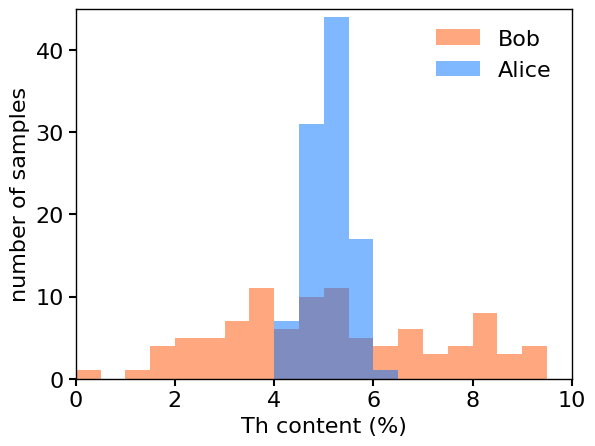

In [ ]:
"""
BLOCK 6
Histograms are a common way of showing 1-variable data.
Execute the code below to get a histogram of Alice's and Bob's results.
"""
# The next three lines plot Bob's and Alice's results.
bins = np.arange(0, 10, 0.5)      # define bins
plt.hist(bob_results, bins=bins, alpha=0.5, label='Bob',
         color=colours["orange"])
plt.hist(alice_results, bins=bins, alpha=0.5, label='Alice',
         color=colours["blue"])
# These lines customise the histogram.
plt.xlim(0, 10)                   # x axis limits
plt.ylim(0, 45)                   # y axis limits
plt.yticks([0, 10, 20, 30, 40])   # y axis ticks
plt.xlabel("Th content (%)")      # x axis label
plt.ylabel("number of samples")   # y axis label
plt.legend(frameon=False)         # show legend
# These lines show or export the histogram.
plt.show()
# plt.savefig("alice_bob_histogram.pdf")

Now download alice_results.csv and bob_results.csv and we shall do the same analysis in Excel. To start, navigate to:
https://excel.cloud.microsoft/.

Question 2:
Cecilia is studying an equilibrium using spectrophotometry. At several different temperatures $T$, she measured the product concentration and determines the equilibrium constant $K$, and recorded her results in ```lin_reg_1.csv```.

Using the van't Hoff equation:

$\mathrm{ln}(K_{\mathrm{eq}})=-\frac{\Delta_\mathrm{r}H}{R}\frac{1}{T}+\frac{\Delta_\mathrm{r}S}{R}$

determine the reaction enthalpy $\Delta_\mathrm{r}H$ and entropy $\Delta_\mathrm{r}S$ and their uncertainties.

In linear regression, we express the relationship between measured values $x_i$ and $y_i$ as:

$y=mx + c$

where $m$ is the **slope** and $c$ is the **intercept**, determined by:

$m=\frac{\sum(x_i - \overline{x})(y_i - \overline{y})}{\sum(x_i - \overline{x})^2}$

$c=\overline{y} - m \overline{x}$

where $\overline{x}$ and $\overline{y}$ are mean values of $x$ and $y$,
respectively. All sums run over the total number of points $N$. The **standard error of the regression** $\sigma_y$ is:

$\sigma_y = \sqrt \frac{\sum(y_i - \hat{y}_i)^2}{N-2}$

and expresses the average distance of a point $y_i$ from its predicted value $\hat{y}_i$. It **tends to a constant value as $N$ increases**, providing information about goodness-of-fit. The standard errors of $m$ and $c$ are:

$\sigma_m = \frac{ \sigma_y }{ \sqrt{ \sum (x_i - \overline{x})^2 } }$

$\sigma_c = \sigma_y \sqrt{ \frac{1}{N} + \frac{ \overline{x}^2 }{ \sum (x_i - \overline{x})^2}}$

As we increase the number of points, $\sigma_m$ and $\sigma_c$ **tend to zero** as we become more confident in our estimates of $m$ and $c$.



In [ ]:
"""
BLOCK 7
First let's take a look at the csv file.
Then we shall load it into an array.
"""
T = np.genfromtxt("lin_reg_1.csv", delimiter=",", skip_header=1, usecols=0)
K = np.genfromtxt("lin_reg_1.csv", delimiter=",", skip_header=1, usecols=1)
# sanity check
print(f" Temperatures are {T}")
print(f" Equilibrium constants are {K}.")



 Temperatures are [280. 290. 300. 310. 320. 330.]
 Equilibrium constants are [  1257.712899   3838.652229   7876.308321  27756.91956   39236.33193
 134098.9054  ].


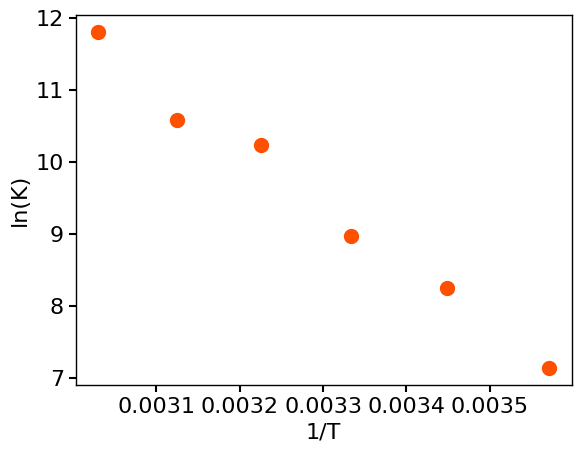


Slope: -8339.9188
Intercept: 36.9263
R-value: -0.9937
P-value: 0.0001
Standard error of slope: 468.5105
Standard error of intercept: 1.5434


In [ ]:
"""
BLOCK 8
Now we shall do the linear regression.
"""

from scipy.stats import linregress # import the relevant library

# Define x and y arrays here.
x = 1/T
y = np.log(K) # in NumPy log -> ln

# Some minimal plotting (s determines size).
plt.scatter(x, y, color=colours["orange"], s=100)
plt.xlabel("1/T")
plt.ylabel("ln(K)")
plt.show()

# Now let us do the linear regression.
reg_params = linregress(x, y)
slope = reg_params.slope
intercept = reg_params.intercept
r_value = reg_params.rvalue
p_value = reg_params.pvalue
std_err_slope = reg_params.stderr
std_err_intercept = reg_params.intercept_stderr

print(f"\nSlope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"R-value: {r_value:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Standard error of slope: {std_err_slope:.4f}")
print(f"Standard error of intercept: {std_err_intercept:.4f}")

We shall use the PyPlot library for plotting. The basic syntax is:
```
plt.scatter(x, y) # plots points, x and y are arrays
plt.plot(x, y) # plots a line, x and y are arrays
plt.show() # shows all plots since last plt.show or plt.savefig
```

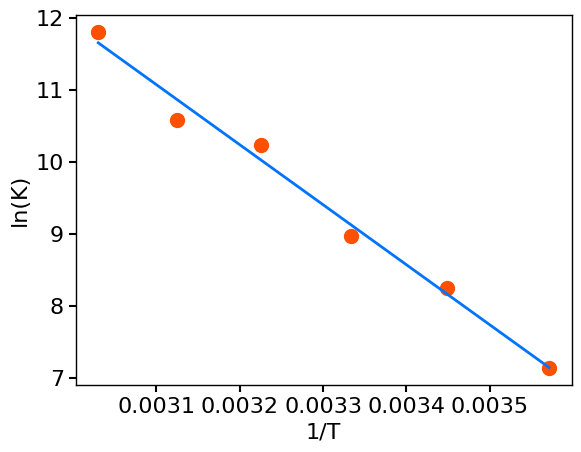

In [ ]:
"""
BLOCK 9
Now try to plot the data and the regression line.
"""

plt.scatter(x, y, color=colours["orange"], s=100)
plt.plot(x, slope*x+intercept, color=colours["blue"])
plt.xlabel("1/T")
plt.ylabel("ln(K)")
plt.show()

Comparing the van't Hoff equation:

$\mathrm{ln}(K_{\mathrm{eq}})=-\frac{\Delta_\mathrm{r}H}{R}\frac{1}{T}+\frac{\Delta_\mathrm{r}S}{R}$

with our linear regression:

$\mathrm{ln}(K_{\mathrm{eq}})=m\frac{1}{T}+c$

we can see that:

$\Delta_\mathrm{r}H = - m R$

and:

$\Delta_\mathrm{r}S =  c R$

Recalling that $R$ = 8.314 J/(mol K), we can now determine $\Delta_\mathrm{r}H$ and $\Delta_\mathrm{r}S$ and their uncertanties.

In [ ]:
"""
BLOCK 10
In block 9, you have defined the variables:
 - slope
 - intercept
 - std_err_slope
 - std_err_intercept.
Now use them to determine the enthalpy and entropy and their errors.
"""
gas_constant = 8.314 # J/(mol K)
drH = -slope * gas_constant
sigma_drH = std_err_slope * gas_constant
drS = intercept * gas_constant
sigma_drS = std_err_intercept * gas_constant

print(f"The enhalpy is:")
print(f"drH = {drH/1000:.0f} +/- {sigma_drH/1000:.0f} kJ/mol")
print(f"")
print(f"The entropy is:")
print(f"drS = {drS:.0f} +/- {sigma_drS:.0f} J/(mol K)")

The enhalpy is:
drH = 69 +/- 4 kJ/mol

The entropy is:
drS = 307 +/- 13 J/(mol K)


Finally, we shall download ```lin_req_1.csv``` and do the linear regression in
Excel. Navigate to: https://excel.cloud.microsoft/.